### important libraries


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from joblib import dump, load

data load

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [21]:
px.scatter_3d(df,x='Paleonium',y='Pressure',z='Price')


### preprocessing skipped in this

In [22]:
# Feature selection (X, y) & Split into xtrain,xtest,ytrain,ytest
X = df[['Paleonium','Pressure']]
y = df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2, random_state=1)

### Algorithm instantiate and fit

In [23]:
model = DecisionTreeRegressor(max_depth=25)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=25)

### score and other metrics

In [24]:
print("score:", model.score(xtest,ytest) * 100)
pred = model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 95.38712733434622
mse: 4286.526148823537
mae: 21.992478413857


### visualization

<AxesSubplot:ylabel='Density'>

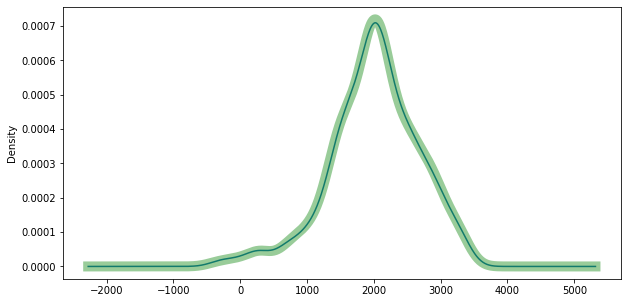

In [25]:
df['p1'] = pred
ax = df['Price'].plot(kind='kde',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,alpha=.4, color='green',linewidth=10)

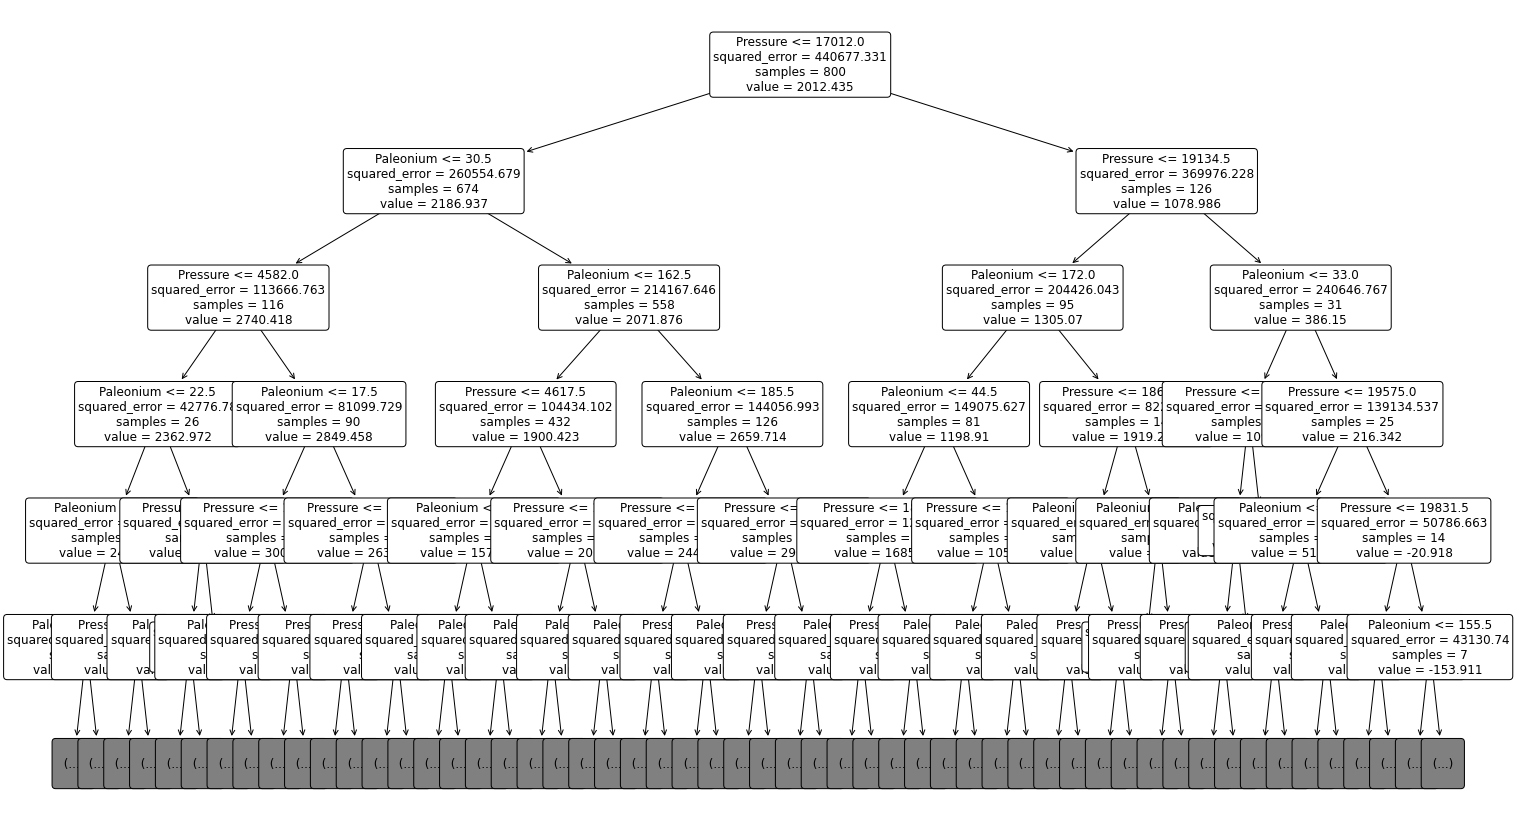

In [31]:
plt.figure(figsize=(25,15))
plot_tree(model,max_depth=5, fontsize=12, feature_names=['Paleonium','Pressure'], rounded= True)
plt.show()

### save the model

In [26]:
dump(model,"basic_diamond_pricing.pkl")

['basic_diamond_pricing.pkl']